In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
flat_chess=cv2.imread("C:/Computer Graphics/flat_chessboard.jpg")
flat_chess =cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

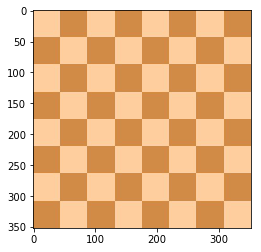

In [6]:
plt.imshow(flat_chess)

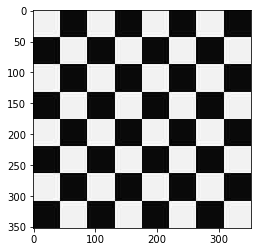

In [9]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

In [7]:
real_chess=cv2.imread("C:/Computer Graphics/real_chessboard.jpg")
real_chess =cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

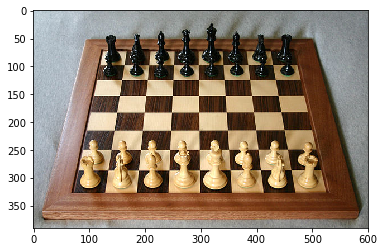

In [8]:
plt.imshow(real_chess)

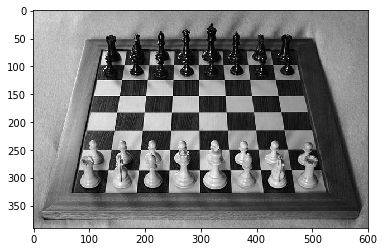

In [10]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap='gray')

### cornerHarris Function

src Input single-channel 8-bit or floating-point image.

dst Image to store the Harris detector responses. It has the type CV_32F

C1 and the same size as src.

blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs).

ksize Aperture parameter for the Sobel operator.

k Harris detector free parameter. See the formula in DocString borderType Pixel extrapolation method. See #BorderTypes.

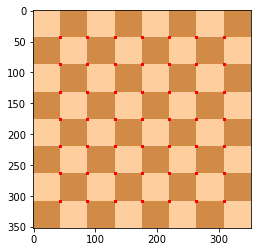

In [15]:
# Convert Gray Image to float Vales
gray = np.float32(gray_flat_chess)

"""
gray_flat_chess: This is assumed to be the grayscale version of the input Image.
Grayscale Images have pixel values ranging from 0 to 255.
np.float32(gray_flat_chess): This converts the grayscale inage into a float32 data type.
This is necessary because the Harris Corner Detection algorithm requires floating-point 
precision to perform accurate computations.
"""

# Corner Harris Detection

dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=1,k=0.04)

"""
cv2.cornerHarris(): This function detects corners in the grayscale image using
src=gray: The source Image, which is the grayscale image converted to float values.
blockSize=2: This is the size of the neighborhood considered for corner detection.
A smaller value focuses on more local features.
ksize 3: The aperture parameter of the Sobel derivative used in the computation.
It determines the size of the window for the derivative calculation.
k=0.04: Harris detector free parameter,
used to separate corner-like responses from edge-like responses.
"""



# result is dilated for marking the corners, not Leportant to actual corner detection
# this is just so we can plot out the points on the image shown dst= cv2.dilate(dst, None)
dst = cv2.dilate(dst,None)
"""
cv2.dilate(): This function dilates (expands) the areas around detected corners. 
Dilation is not necessary for detecting the corners but is often used to make the 
detected points more visible when plotting.
"""

# Threshold for an optimal valve, it may vary depending on the image.
flat_chess[dst>0.01*dst.max()]=[255,0,0]
'''
dit > 0.01 * dst.max(): This creates a mask where only the points in the 
dst array with a value greater than 1% of the maximum value are considered as corners.
Flat chess[dst 0.01 dst.nex()] [255, 0, 0): This sets the pixels. 
in the original image (flat chess) that correspond to corners to the color red [255, 0, 0].
This highlights the detected corners in red on the image.'''

plt.imshow(flat_chess)

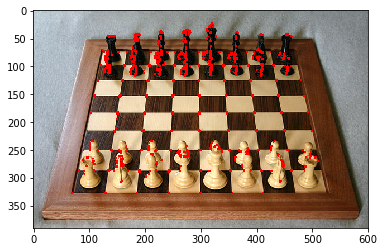

In [17]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=1,k=0.04)
dst = cv2.dilate(dst,None)
real_chess[dst>0.01*dst.max()]=[255,0,0]
plt.imshow(real_chess)